# MA770 Mathematical and Statistical Methods of Bioinformatics
# Problem Set 10.2 (b)
### Cheng, Wanli U31865818

# Gene Expression Array Clustering

## (b) $k$-means

In [434]:
# Load modules we'll need.
import xlsxwriter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

### Import the Data

In [1]:
# Import the Golub datasets

D = open('PS10.txt', 'r')
Data = D.readlines()

In [436]:
# Generate the dataset such that each feature vector correspond to a row in 16 by 978 matrix X.

def X(D):
    M=np.size(D)
    XT=np.zeros((M-1,16))
    for m in np.arange(M):
        if m>0:
            for n in np.arange(16):
                XT[(m-1,n)]=XT[(m-1,n)]+float(Data[m].split()[-16:][n]) #The last 16 numbers of each line is the indormation we want
    return np.transpose(XT) #The original matrix takes each vector as a column, we transpose it so that each feature vectors are rows of X.  

In [437]:
# Randomize the matrix X.

def R(X):
    (M,N)=np.shape(X)
    Rindex=np.random.choice(16,16,replace=False)
    R=np.zeros((M,N))
    for m in np.arange(M):
        R[m]=R[m]+X[Rindex[m]]
    return R

In [438]:
def ReAr(X,l):
    (M,N)=np.shape(X)
    RAX=np.zeros((M,N))
    I1=[]
    I0=[]
    for m in np.arange(16):
        if l[m] == 1:
            I1=np.append(I1,[m])
        else:
            I0=np.append(I0,[m])
    k=np.size(I1)
    for m in np.arange(16):
        if m<k:
            RAX[m]=RAX[m]+X[int(I1[m])]
        else:
            RAX[m]=RAX[m]+X[int(I0[m-k])]
    return RAX

In [439]:
X=X(Data)
RX=R(X)

In [441]:
np.shape(X)

(16, 978)

In [440]:
workbook = xlsxwriter.Workbook('arrays.xlsx')
worksheet = workbook.add_worksheet()

array = X

row = 0

for col, data in enumerate(array):
    worksheet.write_column(row, col, data)

workbook.close()

### Heat Map

**Question：** Why would we then expect a heat map like this（red-white squares pattern）？

**Answer：** By definition of heat map, we would expect that the datapoints in the same clusters have closer distance, therefore, if we use kronecker delta as the distance function, the two red blocks in the principal diagonal simply represents the two clusters we classified. And white blocks the cross terms.

**Question：** In practice, it's more likely to get a map like this (the ckecked pattern), why?

**Answer：** Because, without sort the data beforehand, we may expect that the column of the matrix may denote a random sequence of points between two clusters(e.g., $\mathbf{v}=(1,1,1,2,2,1,1,1,2,1,2)$. Then we would expect several smaller blocks in the principle diagonal, and some "pink"cross terms existence in the graph. 

In [426]:
def D(X):
    D=np.zeros((16,16))
    for m in np.arange(16):
        for n in np.arange(16):
            D[(m,n)]=np.linalg.norm((X[m]-X[n]),ord=1)
    return D

In [427]:
DisX=D(X)
DisRX=D(RX)

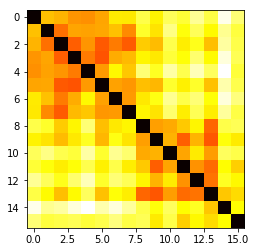

In [428]:
plt.imshow(DisX, cmap='hot', interpolation='nearest')
plt.show()

In [429]:
kmeans = KMeans(n_clusters=2,init='random',tol=0.0001,n_init=16).fit(X)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

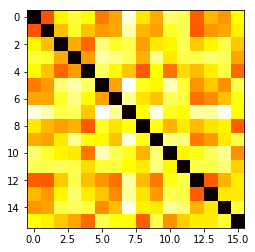

In [430]:
plt.imshow(DisRX, cmap='hot', interpolation='nearest')
plt.show()

In [431]:
kmeans = KMeans(n_clusters=2,init='random',tol=0.0001,n_init=16).fit(RX)
kmeans.labels_

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int32)

In [432]:
DisRAX=D(ReAr(RX,kmeans.labels_))

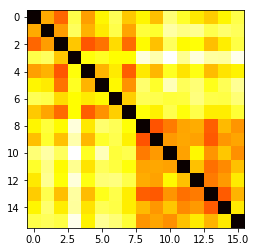

In [433]:
plt.imshow(DisRAX, cmap='hot', interpolation='nearest')
plt.show()

**Comments:** The $k$-means can differentiate two cluster of data (even if we randomize the initial sequence of data points). And it can be seen on the heat graph which directly use the euclidean distance between data points. A very similar pattern of the red-white one comes out after we applied $k$-means algorithms. That means, the distance of data points are closer to each other in the same cluster (warmer color), and far away from data points belong to the other cluster.